# **Mejora de los modelos con hiperparámetros**

A menudo, los modelos simples con conjuntos de datos pequeños se pueden ajustar en un solo paso, mientras que los conjuntos de datos más grandes y los modelos más complejos deben ajustarse mediante el uso repetido del modelo con datos de entrenamiento y la comparación de la salida con la etiqueta esperada. Si la predicción es lo suficientemente precisa, consideramos que el modelo está entrenado. Si no es así, se ajusta ligeramente el modelo y se vuelve a repetir.

Los hiperparámetros son valores que cambian la forma en que el modelo se ajusta durante estos bucles. La velocidad de aprendizaje, por ejemplo, es un hiperparámetro que establece cuánto se ajusta un modelo durante cada ciclo de entrenamiento. Una alta velocidad de aprendizaje significa que un modelo se puede entrenar más rápido, pero si es demasiado alta, los ajustes pueden ser tan grandes que el modelo nunca termine de ajustarse y no sea óptimo.

## **Preprocesamiento de datos**
El preprocesamiento hace referencia a los cambios realizados en los datos antes de pasarse al modelo. Ya hemos leído que el preprocesamiento puede implicar la limpieza del conjunto de datos. Aunque esto es importante, el preprocesamiento también puede incluir el cambio del formato de los datos para que el modelo los pueda usar más fácilmente. Por ejemplo, los datos descritos como "rojo", "naranja", "amarillo", "lima" y "verde", pueden funcionar mejor si se convierten en un formato más nativo para los equipos, como números que indican la cantidad de rojo y la cantidad de verde.

### **Características de escalado**
El paso de preprocesamiento más común consiste en escalar las características para se encuentren entre cero y uno. Por ejemplo, el peso de una bicicleta y la distancia que una persona recorre en una bicicleta pueden ser dos números muy diferentes, pero al escalar ambos números a entre cero y uno, los modelos pueden aprender de los datos con mayor eficacia.

### **Uso de categorías como características**
En el aprendizaje automático, también se pueden usar características de categorías como "bicicleta", "monopatín" o "automóvil". Estas características se representan mediante valores de 0 o 1 en **vectores one-hot**, vectores que tienen 0 o 1 para cada valor posible. Por ejemplo, la bicicleta, el monopatín y el automóvil podrían ser respectivamente (1,0,0), (0,1,0) y (0,0,1).



---



# **Ejercicio: Optimización y guardado de modelos**

## **Regresión - Optimizar y guardar modelos**
En el cuaderno anterior, usamos modelos de regresión complejos para observar la relación entre las características de un conjunto de datos de alquiler de bicicletas. En este portátil, veremos si podemos mejorar aún más el rendimiento de estos modelos.

Comencemos cargando los datos de bicicletas compartidas como un Pandas DataFrame y viendo las primeras filas. Como de costumbre, también dividiremos nuestros datos en conjuntos de datos de entrenamiento y prueba.

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# load the training dataset
!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
bike_data = pd.read_csv('daily-bike-share.csv')
bike_data['day'] = pd.DatetimeIndex(bike_data['dteday']).day
numeric_features = ['temp', 'atemp', 'hum', 'windspeed']
categorical_features = ['season','mnth','holiday','weekday','workingday','weathersit', 'day']
bike_data[numeric_features + ['rentals']].describe()
print(bike_data.head())


# Separate features and labels
# After separating the dataset, we now have numpy arrays named **X** containing the features, and **y** containing the labels.
X, y = bike_data[['season','mnth', 'holiday','weekday','workingday','weathersit','temp', 'atemp', 'hum', 'windspeed']].values, bike_data['rentals'].values

# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training Set: %d rows\nTest Set: %d rows' % (X_train.shape[0], X_test.shape[0]))


--2023-03-19 19:14:38--  https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/daily-bike-share.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 48800 (48K) [text/plain]
Saving to: ‘daily-bike-share.csv.2’

daily-bike-share.cs 100%[===================>]  47.66K  --.-KB/s    in 0.004s  

2023-03-19 19:14:38 (13.2 MB/s) - ‘daily-bike-share.csv.2’ saved [48800/48800]

   instant    dteday  season  yr  mnth  holiday  weekday  workingday  \
0        1  1/1/2011       1   0     1        0        6           0   
1        2  1/2/2011       1   0     1        0        0           0   
2        3  1/3/2011       1   0     1        0        1           1   
3        4  1/4/2011       1   0     1        0       

Ahora tenemos los siguientes cuatro conjuntos de datos:

- **X_train :** los valores de características que usaremos para entrenar el modelo
- **y_train :** las etiquetas correspondientes que usaremos para entrenar el modelo
- **X_test :** los valores de características que usaremos para validar el modelo
- **y_test :** Las etiquetas correspondientes que usaremos para validar el modelo.

Ahora estamos listos para entrenar un modelo ajustando un algoritmo de conjunto potenciador , como en nuestro último cuaderno. Recuerde que un estimador de aumento de gradiente es como un algoritmo de bosque aleatorio, pero en lugar de construir todos los árboles de forma independiente y tomar el resultado promedio, cada árbol se construye sobre las salidas del anterior en un intento de reducir gradualmente la pérdida ( error ) en el modelo

GradientBoostingRegressor() 

MSE: 103593.51065019234
RMSE: 321.85945791632776
R2: 0.7969114242763833


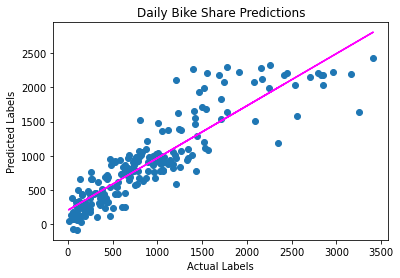

In [35]:
# Train the model
from sklearn.ensemble import GradientBoostingRegressor, RandomForestRegressor


# Fit a lasso model on the training set
model = GradientBoostingRegressor().fit(X_train, y_train)
print (model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

## **Optimizar hiperparámetros**

Eche un vistazo a la definición del estimador `GradientBoostingRegressor` en el resultado anterior y tenga en cuenta que, al igual que los otros estimadores que probamos anteriormente, incluye una gran cantidad de parámetros que controlan la forma en que se entrena el modelo. En aprendizaje automático, el término parámetros se refiere a valores que se pueden determinar a partir de datos; los valores que especifica para afectar el comportamiento de un algoritmo de entrenamiento se conocen más correctamente como hiperparámetros .

Los hiperparámetros específicos para un estimador varían según el algoritmo que encapsula el estimador. En el caso del estimador `GradientBoostingRegressor` , el algoritmo es un conjunto que combina varios árboles de decisión para crear un modelo predictivo general. Puede obtener información sobre los hiperparámetros para este estimador en la [documentación de Scikit-Learn](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html) .

No entraremos en los detalles de cada hiperparámetro aquí, pero trabajan juntos para afectar la forma en que el algoritmo entrena un modelo. En muchos casos, los valores predeterminados proporcionados por Scikit-Learn funcionarán bien; pero puede haber alguna ventaja en la modificación de los hiperparámetros para obtener un mejor rendimiento predictivo o reducir el tiempo de entrenamiento.

Entonces, ¿cómo sabe qué valores de hiperparámetro debe usar? Bueno, en ausencia de una comprensión profunda de cómo funciona el algoritmo subyacente, deberá experimentar. Afortunadamente, SciKit-Learn proporciona una forma de ajustar los hiperparámetros probando varias combinaciones y encontrando el mejor resultado para una métrica de rendimiento determinada.

Intentemos usar un enfoque de búsqueda de cuadrícula para probar combinaciones de una cuadrícula de valores posibles para los hiperparámetros `learning_rate` y `n_estimators` del estimador `GradientBoostingRegressor` .

Best parameter combination: {'learning_rate': 0.1, 'n_estimators': 50} 

GradientBoostingRegressor(n_estimators=50) 

MSE: 109056.06739362908
RMSE: 330.23638108728886
R2: 0.7862024246308351


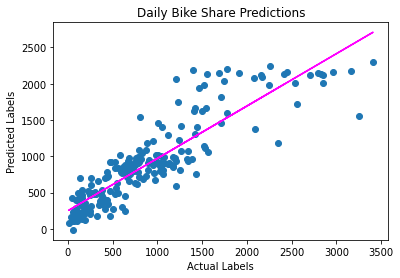

In [36]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, r2_score

# Use a Gradient Boosting algorithm
alg = GradientBoostingRegressor()

# Try these hyperparameter values
params = {
 'learning_rate': [0.1, 0.5, 1.0],
 'n_estimators' : [50, 100, 150]
 }

# Find the best hyperparameter combination to optimize the R2 metric
score = make_scorer(r2_score)
gridsearch = GridSearchCV(alg, params, scoring=score, cv=3, return_train_score=True)
gridsearch.fit(X_train, y_train)
print("Best parameter combination:", gridsearch.best_params_, "\n")

# Get the best model
model=gridsearch.best_estimator_
print(model, "\n")

# Evaluate the model using the test data
predictions = model.predict(X_test)
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
# overlay the regression line
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

> Nota : el uso de valores aleatorios en el algoritmo Gradient Boost da como resultado métricas ligeramente diferentes cada vez. En este caso, es poco probable que el mejor modelo producido por el ajuste de hiperparámetros sea significativamente mejor que uno entrenado con los valores predeterminados de hiperparámetros; ¡pero sigue siendo útil conocer la técnica de ajuste de hiperparámetros!

## **Preprocesar los datos**
Entrenamos un modelo con datos que se cargaron directamente desde un archivo de origen, con resultados solo moderadamente exitosos.

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo a ellos. Hay una gran variedad de transformaciones de preprocesamiento que puede realizar para preparar sus datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

### **Escalar características numéricas**
La normalización de las características numéricas para que estén en la misma escala evita que las características con valores grandes produzcan coeficientes que afecten de manera desproporcionada a las predicciones. Por ejemplo, suponga que sus datos incluyen las siguientes características numéricas:

<div align="center">

|  A	|  B	|  C |
|  :---------:  |  :---------:  |  :---------:  |
|  3	| 480	| 65 |

</div>

La normalización de estas características a la misma escala puede dar como resultado los siguientes valores (suponiendo que A contiene valores de 0 a 10, B contiene valores de 0 a 1000 y C contiene valores de 0 a 100):

<center>

|  A	|  B	|  C |
|  :---------:  |  :---------:  |  :---------:  |
|  0.3	| 0.48	| 0.65 |

</center>

Hay varias formas de escalar datos numéricos, como calcular los valores mínimo y máximo para cada columna y asignar un valor proporcional entre 0 y 1, o usar la media y la desviación estándar de una variable normalmente distribuida para mantener la misma dispersión de valores en una escala diferente.

### **Codificación de variables categóricas**
Los modelos de aprendizaje automático funcionan mejor con características numéricas en lugar de valores de texto, por lo que generalmente necesita convertir características categóricas en representaciones numéricas. Por ejemplo, suponga que sus datos incluyen la siguiente característica categórica.

<div align="center">

| Tamaño  | 
|:----------:|
| S |
| M |
| L |

</div>

Puede aplicar la codificación ordinal para sustituir un valor entero único para cada categoría, así:

<div align="center">

| Tamaño  | 
|:----------:|
| 0 |
| 1 |
| 2 |

</div>

Otra técnica común es usar `one hot encoding` (una codificación activa) para crear características binarias individuales (0 o 1) para cada valor de categoría posible. Por ejemplo, podría usar la codificación one-hot para traducir las posibles categorías en columnas binarias como esta:

<div align="center">

| Talla S | Talla M | Talla L |
| :-----: | :---------: | :---------: |
| <img width=100/> 1 <img width=100/> | <img width=100/> 0 <img width=100/> | <img width=100/> 0 <img width=100/> |
| <img width=100/> 0 <img width=100/> | <img width=100/> 1 <img width=100/> | <img width=100/> 0 <img width=100/> |
| <img width=100/> 0 <img width=100/> | <img width=100/> 0 <img width=100/> | <img width=100/> 1 <img width=100/> |

</div>


Para aplicar estas transformaciones de preprocesamiento al alquiler de bicicletas, utilizaremos una característica de Scikit-Learn llamada pipelines . Estos nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. A continuación, puede ajustar toda la canalización a los datos, de modo que el modelo encapsule todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos usar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías que se usan con los datos de entrenamiento).

> Nota : El término canalización se usa ampliamente en el aprendizaje automático, ¡a menudo para significar cosas muy diferentes! En este contexto, lo usamos para referirnos a objetos de canalización en Scikit-Learn, pero es posible que vea que se usa en otros lugares para significar otra cosa.

In [37]:
pd.DataFrame(X_train)
# 0 - 5:  variables categoricas: 'season','mnth', 'holiday','weekday','workingday','weathersit'
# 6 - 9: variables numericas: 'temp', 'atemp', 'hum', 'windspeed'
# de y train: 'rentals'

,0,1,2,3,4,5,6,7,8,9
0,2.0,6.0,0.0,5.0,1.0,1.0,0.649167,0.597862,0.467917,0.175383
1,1.0,1.0,0.0,4.0,1.0,1.0,0.165000,0.150883,0.470417,0.301000
2,2.0,6.0,0.0,6.0,0.0,1.0,0.725000,0.678038,0.654583,0.154850
3,3.0,7.0,0.0,2.0,1.0,2.0,0.720833,0.664796,0.667500,0.151737
4,2.0,5.0,0.0,4.0,1.0,1.0,0.593333,0.572613,0.520000,0.229475
...,...,...,...,...,...,...,...,...,...,...
506,4.0,12.0,0.0,6.0,0.0,2.0,0.381667,0.389508,0.911250,0.101379
507,3.0,7.0,0.0,2.0,1.0,1.0,0.794167,0.739275,0.559167,0.200254
508,3.0,9.0,0.0,5.0,1.0,1.0,0.599167,0.571971,0.668750,0.154229
509,3.0,7.0,0.0,5.0,1.0,2.0,0.731667,0.667933,0.485833,0.080850


In [41]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LinearRegression
import numpy as np

# Define preprocessing for numeric columns (scale them)
numeric_features = [6,7,8,9]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode them)
categorical_features = [0,1,2,3,4,5]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', GradientBoostingRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)
model

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', GradientBoostingRegressor())])


Bien, el modelo está entrenado, incluidos los pasos de preprocesamiento. Veamos cómo se comporta con los datos de validación.

MSE: 105383.60906643479
RMSE: 324.6284169114509
R2: 0.7934020486844374


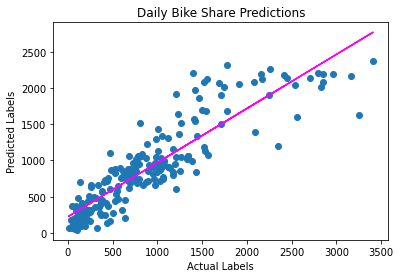

In [42]:
# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

La canalización se compone de las transformaciones y el algoritmo utilizado para entrenar el modelo. Para probar un algoritmo alternativo, simplemente puede cambiar ese paso a un tipo diferente de estimador.

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [6, 7, 8, 9]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [0, 1, 2, 3, 4, 5])])),
                ('regressor', RandomForestRegressor())]) 

MSE: 107570.94802636364
RMSE: 327.98010309523903
R2: 0.7891139079388577


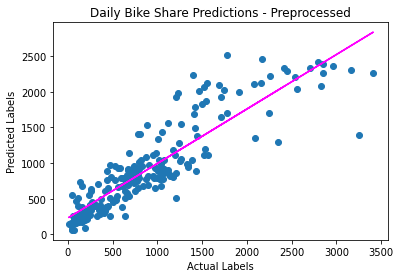

In [43]:
# Use a different estimator in the pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', RandomForestRegressor())])


# fit the pipeline to train a linear regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model, "\n")

# Get predictions
predictions = model.predict(X_test)

# Display metrics
mse = mean_squared_error(y_test, predictions)
print("MSE:", mse)
rmse = np.sqrt(mse)
print("RMSE:", rmse)
r2 = r2_score(y_test, predictions)
print("R2:", r2)

# Plot predicted vs actual
plt.scatter(y_test, predictions)
plt.xlabel('Actual Labels')
plt.ylabel('Predicted Labels')
plt.title('Daily Bike Share Predictions - Preprocessed')
z = np.polyfit(y_test, predictions, 1)
p = np.poly1d(z)
plt.plot(y_test,p(y_test), color='magenta')
plt.show()

Ahora hemos visto una serie de técnicas comunes que se utilizan para entrenar modelos predictivos para la regresión. En un proyecto real, probablemente probaría algunos algoritmos, hiperparámetros y transformaciones de preprocesamiento más; pero a estas alturas ya deberías tener la idea general. Exploremos cómo puede usar el modelo entrenado con nuevos datos.

### **Usar el modelo entrenado**
Primero, guardemos el modelo.

In [44]:
import joblib

# Save the model as a pickle file
filename = './bike-share.pkl'
joblib.dump(model, filename)

['./bike-share.pkl']

Ahora, podemos cargarlo cuando lo necesitemos y usarlo para predecir etiquetas para nuevos datos. Esto a menudo se denomina puntuación o inferencia (scoring or inferencing).

In [45]:
# Load the model from the file
loaded_model = joblib.load(filename)

# Create a numpy array containing a new observation (for example tomorrow's seasonal and weather forecast information)
X_new = np.array([[1,1,0,3,1,1,0.226957,0.22927,0.436957,0.1869]]).astype('float64')
print ('New sample: {}'.format(list(X_new[0])))

# Use the model to predict tomorrow's rentals
result = loaded_model.predict(X_new)
print('Prediction: {:.0f} rentals'.format(np.round(result[0])))

New sample: [1.0, 1.0, 0.0, 3.0, 1.0, 1.0, 0.226957, 0.22927, 0.436957, 0.1869]
Prediction: 93 rentals


El método de predicción del modelo acepta una matriz de observaciones, por lo que puede usarlo para generar múltiples predicciones como un lote. Por ejemplo, suponga que tiene un pronóstico del tiempo para los próximos cinco días; podría usar el modelo para predecir los alquileres de bicicletas para cada día en función de las condiciones climáticas esperadas.

In [51]:
# An array of features based on five-day weather forecast
X_new = np.array([[0,1,1,0,0,1,0.344167,0.363625,0.805833,0.160446],
                  [0,1,0,1,0,1,0.363478,0.353739,0.696087,0.248539],
                  [0,1,0,2,0,1,0.196364,0.189405,0.437273,0.248309],
                  [0,1,0,3,0,1,0.2,0.212122,0.590435,0.160296],
                  [0,1,0,4,0,1,0.226957,0.22927,0.436957,0.1869]])

# Use the model to predict rentals
results = loaded_model.predict(X_new)
print(results) #ver todos

print('5-day rental predictions:')
for prediction in results:
    print(np.round(prediction))

[594.15 803.53 250.92 223.91 305.61]
5-day rental predictions:
594.0
804.0
251.0
224.0
306.0


**Resumen**

Con esto concluyen los cuadernos de este módulo sobre regresión. En este cuaderno ejecutamos una regresión compleja, la ajustamos, guardamos el modelo y lo usamos para predecir resultados para el futuro.

**Otras lecturas**

Para obtener más información sobre Scikit-Learn, consulte la [documentación de Scikit-Learn](https://scikit-learn.org/stable/user_guide.html) .

<div align="center">
<style width: 20%>

|     Tables     |      Are      |    Cool    |
|----------|:-------------:|------:|
| col 1 is |  left-aligned | 1600  |
| col 2 is |   centered   |   12 |
| col 3 is | right-aligned |    1 |

</style>
</div>


| <div style="width:290px">property</div> | Description                           |
| ----------------------- | ------------------------------------- |
| `border-bottom-right-radius`            | Defines the shape of the bottom-right |


|Name|Value|
|:----:|:---------:|
|<img width=100/> 5 <img width=100/>|<img width=200/> 56|








|`             Name             ` | `           Value          `|
|:----------------:|:----------------------:|
|value1|value2|
------------------------------------------------------------------|-------------------------------------------------------------------------|



Name &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; | Value &nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;&nbsp; &nbsp; &nbsp; &nbsp; &nbsp; &nbsp;
:----------:|:-------------------:
`Value-One` | Long explanation
`Value-Two` | Long explanation
`etc` | Long explanation